  Preparing metadata (setup.py) ... done
  Created wheel for radar: filename=radar-0.3-py3-none-any.whl size=4988 sha256=93b33e5b1e23108db66754aec1af22f037d07eab10274cbdfb743d06b45bfbe2
  Stored in directory: /root/.cache/pip/wheels/b5/73/ec/597d19e0d44507094a8ce35e41b21f9e71bb599ba37491d4e0
Successfully built radar


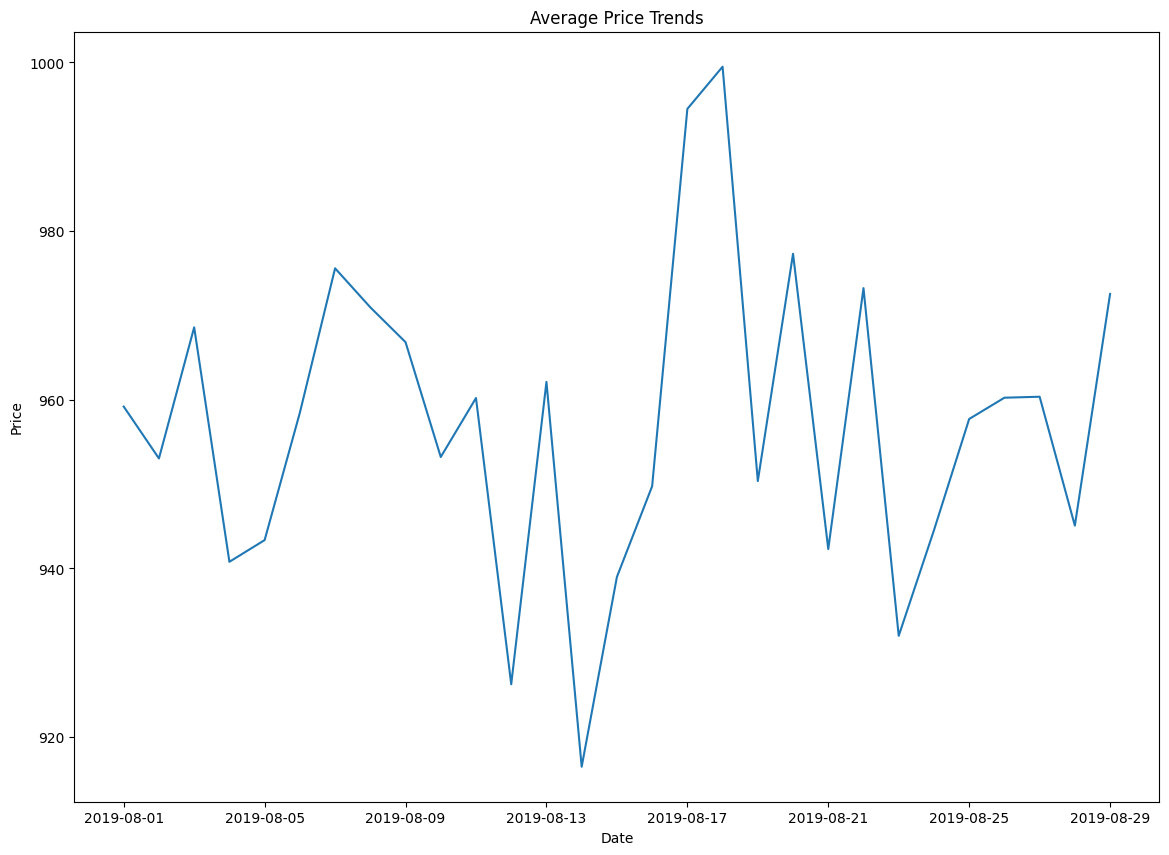

In [ ]:
!pip install radar
import datetime
import pandas as pd
import random
import radar

def generateData(n):
    listdata = []
    start = datetime.datetime(2019, 8, 1)
    end = datetime.datetime(2019, 8, 30)
    for _ in range(n):
        date = radar.random_datetime(start=start, stop=end).strftime("%Y-%m-%d")
        price = round(random.uniform(900, 1000), 4)
        listdata.append([date, price])
    df = pd.DataFrame(listdata, columns=['Date', 'Price'])
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.groupby(by='Date').mean()
    return df

# Generate data
data = generateData(100)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 10)
plt.plot(data.index, data['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Average Price Trends')
plt.show()


In [ ]:
import altair as alt
from vega_datasets import data

usa = data.us_10m.url  # Assuming 'usa' is the URL for the US map data
airports = data.airports.url  # Assuming 'airports' is the URL for airport data

alt.layer(
    alt.Chart(alt.topo_feature(usa, 'states')).mark_geoshape(
        fill='#ddd', stroke='#fff', strokeWidth=1
    ),
    alt.Chart(airports).mark_circle(size=9).encode(
        latitude='latitude:Q',
        longitude='longitude:Q',
        tooltip='iata:N'
    )
).project(
    type='albersUsa'
).properties(
    width=500, height=300
).configure_view(
    stroke=None
)

alt.LayerChart(...)